#Обратное преобразование Фурье. Явление Гиббса

Импортируем нужные библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft
from scipy import signal
from scipy.io import wavfile

###Модуль scipy.fft (fftpack устарел, НЕ используйте) содержит следующие функции:

fft(x[, n, axis, overwrite_x])	Прямое БПФ

ifft(x[, n, axis, overwrite_x])	Обратное БПФ

fft2(x[, shape, axes, overwrite_x])	Двумерное прямое БПФ

ifft2(x[, shape, axes, overwrite_x])	Двумерное обратное БПФ

fft2(x[, shape, axes, overwrite_x])	Многомерное прямое БПФ

ifft2(x[, shape, axes, overwrite_x])	Многомерное обратное БПФ

rfft(x[, n, axis, overwrite_x])	Прямое БПФ вещественного сигнала

irfft(x[, n, axis, overwrite_x])	Обратное БПФ вещественного сигнала

dct(x[, type, n, axis, norm, overwrite_x])	Прямое косинусное ПФ

idct(x[, type, n, axis, norm, overwrite_x])	Обратное косинусное ПФ

dctn(x[, type, shape, axes, norm, overwrite_x])	Многомерное прямое косинусное ПФ

idctn(x[, type, shape, axes, norm, overwrite_x])	Многомерное обратное косинусное БПФ

dst(x[, type, n, axis, norm, overwrite_x])	Прямое синусное ПФ

idst(x[, type, n, axis, norm, overwrite_x])	Обратное синусное ПФ

dstn(x[, type, shape, axes, norm, overwrite_x])	Многомерное прямое синусное ПФ

idstn(x[, type, shape, axes, norm, overwrite_x])	Многомерное обратное синусное БПФ

In [3]:
from scipy.fft import rfft, ifft, irfft

In [4]:
T = 40
Fd = 44100 # Частота дискретизации
A0 = 1
F1 = 440
A1 = 1
Phi1 = 90
F2 = 30
A2 = 0.8
Phi2 = 0
Anoise = 0.3

N = 512*2

In [5]:
# Создаем массив отсчетов времени
t = np.linspace(0, T, Fd)

# Создаем сигнал из двух синусоид и постоянной составляющей
x = A1*np.sin(F1/T*2.0*np.pi*t)

# Число отсчетов для построения спектра
N = 1024*4

**Задание 1:**

Вычислите спектр сигнала без использования оконной функции и с ее применением.

Нарисуйте спектры один под другим.


**Напишите** как влияет на спектр использование окна?

**Задание 2:**

* Выполните ОБРАТНОЕ преобраpование для двух вычисленных спектров.

  Что возвращает функция **ifft**?

  Как получить сам сигнал?

* Постройте график сигнала и двух восстановленных (спектр без и с окнной функцией).

Почему такой результат?

Как исправить?

##Эффект Гиббса

Смоделируем эффект, который возникает в результате **сжатия сигнала**.

Построим спектр сигнала, и занулим там значения частот с маленькими апмлитудами, таким образом надо будет хранить меньше информации о сигнале.

Тот же эффект возникает при замене бесконечной суммы на **частичную сумму** (начиная с какого-то отсчета слагаемые считаем пренебрежимо малыми).

In [5]:
# Зададим частоту дискретизации
Fd = 1000
# Зададим период сигнала
T = 2

# Создаем массив отсчетов времени
t = np.linspace(0, T, T*Fd)

# Создадим сигнал в виде прямоугольного импульса
def rectpuls(t, width):
  x = np.zeros(t.shape)
  x[0 : width] = 1
  return x

width = Fd//2
rect = rectpuls(t, width)

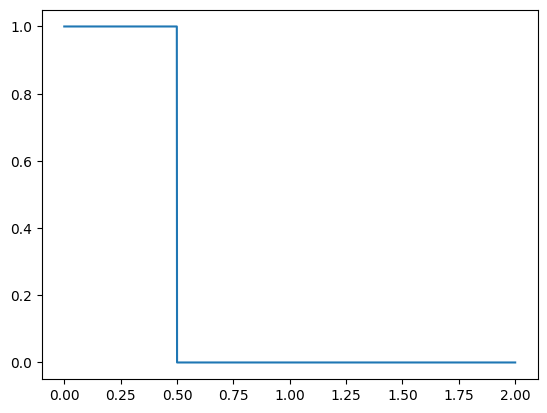

In [6]:
# Нарисуем что получилось
plt.plot(t, rect)

**Задание 3:**
* Вычислите спектр прямоугольного сигнала. Постройте график.
* Занулите в спектре значения меньше порога - моделируем сжатие данных для хранения. Постройте график.
* Восстановите сигнал по его спектральным отсчетам (обратное БПФ). Постройте график.

In [7]:
# Вычислим спектр сигнала
N = T*Fd


In [ ]:
# Рисование спектра


Убедитесь, что после обрезания по порогу спектр поменялся.

In [ ]:
th = 20


Сравните исходный и восстановленный сигналы.

Text(0.5, 0, 'Время')

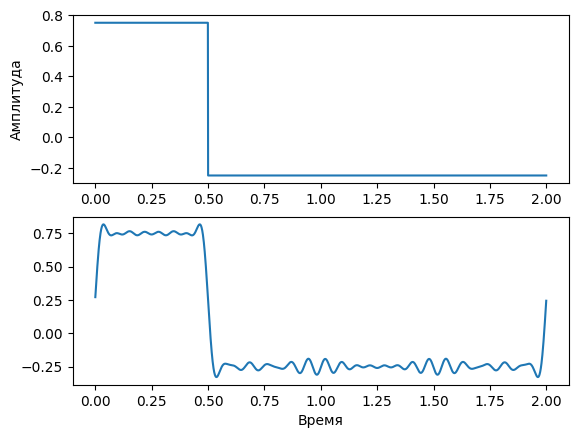

###**Сделайте выводы**
Чем порог ниже, тем

* больше/меньше данных зануляем,

* сильнее/слабже сжатие

* восстановленный сигнал все больше/меньше напоминает исходный

##**Домашнее задание:**
Оформить код в виде функций, почистить.

Нарисовать на одном графике восстановленный сигнал при разных значениях порога.